<a href="https://colab.research.google.com/github/stutis28/Python/blob/master/Sampling_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/winequalityN.csv"
df = pd.read_csv(file_name)
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.shape

(6497, 13)

Random Sampling & verifying the sampling Error to validate the sample

Actual Mean: 10.491801 
Sample Mean: 10.514095 
sample Error: -0.022294 


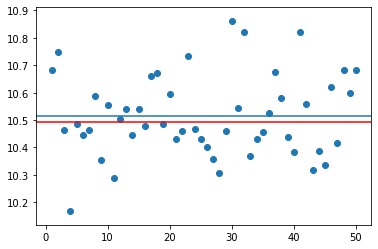

In [7]:
sample_means = []
population_mean = df['alcohol'].mean()
sample_size = 50

for i in range(sample_size):
  sample = df['alcohol'].sample(sample_size,random_state = i)
  sample_means.append(sample.mean())

plt.scatter(range(1,sample_size+1), sample_means)
plt.axhline(population_mean, color = 'red')

sample_size_mean = np.array(sample_means).mean()
plt.axhline(sample_size_mean)

print("Actual Mean: %2f " % (population_mean))
print("Sample Mean: %2f " % (sample_size_mean))
print("sample Error: %2f " % (population_mean - sample_size_mean))


Stratified Sampling

In [8]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [0]:
# Since the proportion of type of wine is different we need to stratify data before Sampling it
stratum_white = df[df.type == 'white']
stratum_red = df[df.type == 'red']

In [12]:
len(stratum_white)

4898

In [14]:
alcohol_per_wine = {}

for stratum, wine_type in [(stratum_white, 'white'), (stratum_red,'red')]:
  sample = stratum['alcohol'].sample(250, random_state= 1)
  alcohol_per_wine[wine_type] = sample.mean()

print(alcohol_per_wine)

{'white': 10.579000000000002, 'red': 10.329800000000002}
